Number 1

Estimated coefficients:
Intercept = 89.12387376799305      
Slope = -9.009466415296778


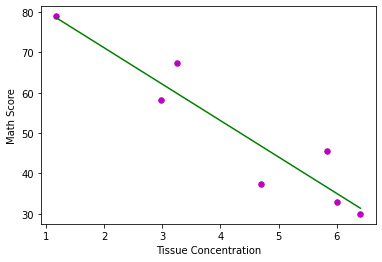

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

name=['Tissue Concentration','Math Score']

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="m",
                marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="g")

    # putting labels
    plt.xlabel(name[0])
    plt.ylabel(name[1])

    # function to show plot
    plt.show()


def main():
    df = pd.read_table("lsd.dat", header=None,delim_whitespace=True,names=name)

    # observations
    x = df[name[0]]
    y = df[name[1]]

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nIntercept = {}  \
    \nSlope = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()

Number 2

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model, metrics


def main():
    df = pd.read_table("tvsales.dat", header=None, delim_whitespace=True)
    df.drop(columns=0, axis=1, inplace=True)

    # defining feature matrix(X) and response vector(y)
    X = df[df.columns[1:]]
    y = df[df.columns[0]]

    # create linear regression object
    reg = linear_model.LinearRegression()

    # train the model using the training sets
    reg.fit(X, y)

    # regression coefficients
    print('Coefficients: \n', reg.coef_)
    print('Intercept: \n', reg.intercept_)


if __name__ == "__main__":
    main()


Coefficients: 
 [  -0.44778243    0.66238667    1.06932447   -1.68859949   17.03056976
  408.35610621 -329.79196578    8.47063034]
Intercept: 
 -798.8923003024013


Number 4

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum((x - m_x) * (y - m_y))
    SS_xx = np.sum((x - m_x) * (x - m_x)) 

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

def main():
    df = pd.read_table("tombstone.dat", header=None,delim_whitespace=True)
    
    
    # observations
    x = df[df.columns[0]]
    y = df[df.columns[1]]

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nIntercept = {}  \
    \nSlope = {}".format(b[0], b[1]))


if __name__ == "__main__":
    main()

Estimated coefficients:
Intercept = 0.32299589884770374      
Slope = 0.008593333144122155


Number 8

In [18]:
import numpy as np
import pandas as pd

data = pd.read_table("manuf_learn.dat", header=None,delim_whitespace=True)

x1 = data[6].values
x2 = data[7].values
y = data[5].values

def normalize(input):
  temp = input
  input = (temp - temp.min()) / (temp.max() - temp.min())
  return input

m = len(x1)
x0 = np.ones(m)
X = np.array([x0, normalize(x1), normalize(x2)]).T
B = np.random.normal(0, 1, 3)
Y = np.array(y)
alpha = 0.01
iteration = 0 
cost = np.sum((X.dot(B) - Y) ** 2)/(2 * m)

while cost > 0.00634:  
  if iteration % 5000 == 0:
    alpha -= 0.0001
  h = X.dot(B)
  loss = h - Y
  gradient = X.T.dot(loss) / m
  B = B - alpha * gradient
  cost = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
  iteration+=1

print("New B : ",B)


New B :  [ 4.95257504 -1.27608709 -0.68728875]
